<a href="https://colab.research.google.com/github/shiling2007/Python-/blob/main/run_SAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://github.com/jakevdp/mst_clustering.ipynb

from IPython.core.display import display, HTML, Image
display(HTML("<style>.container { width:100% !important; }</style>"))
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"
# from google.colab import drive
# drive.mount('/content/drive')
# from google.colab import files
# files.download('/content/drive/MyDrive/Colab Notebooks/Lease Payment Formula.ipynb') 
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000, 
    formatter=dict(float=lambda x: "%.3g" % x))
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 999)
pd.set_option("max_colwidth", 500)
# try:
#  device_name = os.environ['COLAB_TPU_ADDR']
#  TPU_ADDRESS = 'grpc://' + device_name
#  print('Found TPU at: {}'.format(TPU_ADDRESS))
# except KeyError:
#  print('TPU not found')

In [ ]:
import os       #importing os to set environment variable
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      #install openjdk
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       #check java version
install_java()

openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [ ]:
!echo $JAVA_HOME

/usr/lib/jvm/java-8-openjdk-amd64


In [ ]:
# !find $JAVA_HOME java.exe

In [ ]:
# !cd /usr/lib/jvm/java-8-openjdk-amd64/bin/jar
# !ls -lt 

In [ ]:
!pip install saspy

In [ ]:
import saspy
sas = saspy.SASsession(java='/usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java', iomhost=['odaws01-usw2.oda.sas.com',
        'odaws02-usw2.oda.sas.com','odaws03-usw2.oda.sas.com','odaws04-usw2.oda.sas.com'], iomport=8591, encoding='utf-8')
sas



Using SAS Config named: default
Please enter the IOM user id: jshi2@ford.com
Please enter the password for IOM user : ··········
SAS Connection established. Subprocess id is 928



Access Method         = IOM
SAS Config name       = default
SAS Config file       = /usr/local/lib/python3.7/dist-packages/saspy/sascfg.py
WORK Path             = /saswork/SAS_workF29A0000567D_odaws02-usw2.oda.sas.com/SAS_workEDE50000567D_odaws02-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 3.7.4
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 22141


In [ ]:
# !pip install swat

In [ ]:
# from swat import CAS

# s = CAS('odaws01-usw2.oda.sas.com', 5570 , userid, password)

In [ ]:
# %%SAS sas
# proc print data=sashelp.cars ;
# run;

UsageError: Cell magic `%%SAS` not found.


In [ ]:
from IPython.display import HTML
c = sas.submit("""proc print data=sashelp.class;
run;
""")
HTML(c['LST'])

Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5
6,James,M,12,57.3,83.0
7,Jane,F,12,59.8,84.5
8,Janet,F,15,62.5,112.5
9,Jeffrey,M,13,62.5,84.0
10,John,M,12,59.0,99.5


In [ ]:
sas.submitLST("proc print data=sashelp.class; run;", method='listorlog') 

Obs,Name,Sex,Age,Height,Weight
1,Alfred,M,14,69.0,112.5
2,Alice,F,13,56.5,84.0
3,Barbara,F,13,65.3,98.0
4,Carol,F,14,62.8,102.5
5,Henry,M,14,63.5,102.5
6,James,M,12,57.3,83.0
7,Jane,F,12,59.8,84.5
8,Janet,F,15,62.5,112.5
9,Jeffrey,M,13,62.5,84.0
10,John,M,12,59.0,99.5



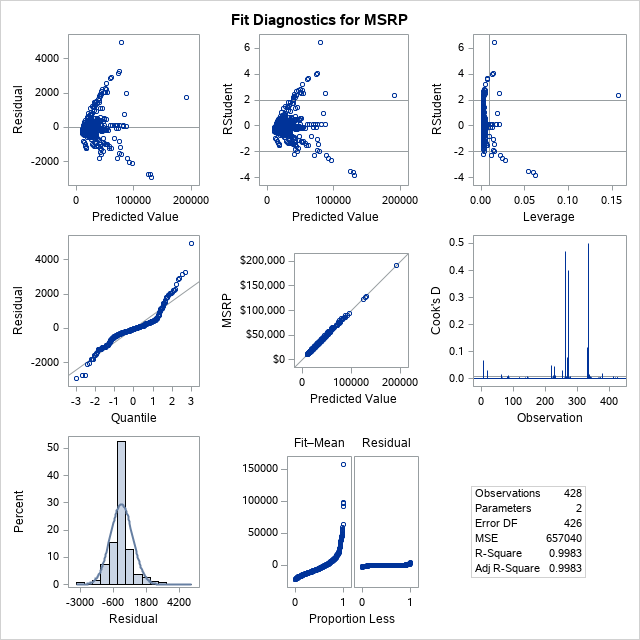
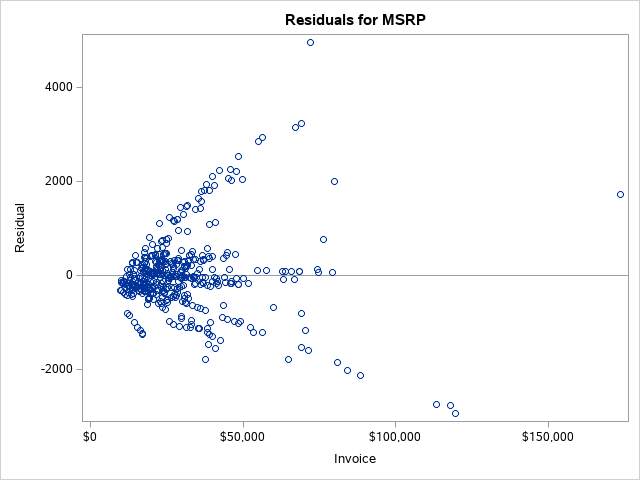
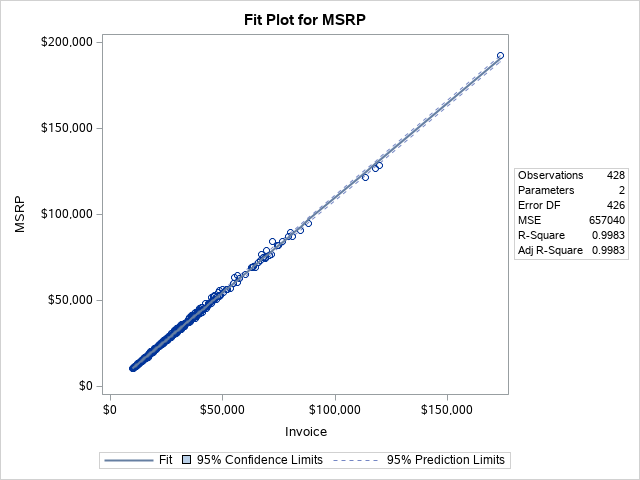

In [ ]:
sas.submitLST("proc reg data=sashelp.cars; \
model MSRP =	Invoice ; \
run;", method='listorlog') 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
X, y = make_blobs(200, centers=4, random_state=42)

data=pd.DataFrame(np.c_[X,y], columns=['X1','X2','Y'])
print(data.head())
sasdf = sas.df2sd(data, 'sasdf')
sas.submitLST("proc print data=work.sasdf (obs=6);run;", method='listorlog')

          X1        X2    Y
0   6.505653  2.447003  1.0
1  -5.128943  9.836189  0.0
2  -8.850575  6.426269  3.0
3 -10.286412  5.916059  3.0
4  -7.468992 -6.030507  2.0


NameError: ignored

In [ ]:
sasdf = sas.df2sd(data, 'sasdf')
sas.submitLST("proc print data=work.sasdf (obs=6);run;", method='listorlog')

Obs,X1,X2,Y
1,6.5057,2.44700,1
2,-5.1289,9.83619,0
3,-8.8506,6.42627,3
4,-10.2864,5.91606,3
5,-7.4690,-6.03051,2
6,-6.1323,-6.26974,2



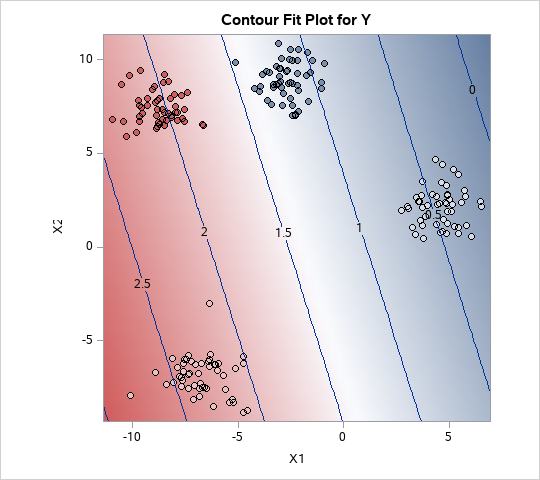

In [ ]:
sas.submitLST("proc glm data=work.sasdf; model y=x1 x2 / ; run;quit;", method='listorlog') 

In [ ]:
sas.submitLST("proc setinit;  run;") 

In [ ]:
sas.submitLST("proc optmodel; \
var x{1..10};\
fix x = 0; \
fix x[10] = 1; print x; quit;") 

[1],x
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,1


In [ ]:
sas.submitLST("data temp; do i=1 to 3; output;end; run;")
sas.submitLST("proc datasets; lib=work;quit;")


In [ ]:
df = sas.sd2df('temp', 'work')
df

,i
0,1.0
1,2.0
2,3.0


In [ ]:
df.columns

Index(['i'], dtype='object')

In [ ]:
sas.datasets

<bound method SASsession.datasets of Access Method         = IOM
SAS Config name       = default
SAS Config file       = /usr/local/lib/python3.7/dist-packages/saspy/sascfg.py
WORK Path             = /saswork/SAS_workF29A0000567D_odaws02-usw2.oda.sas.com/SAS_workEDE50000567D_odaws02-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 3.7.4
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 22141

>

In [ ]:
sas.cat

<bound method SASsession.cat of Access Method         = IOM
SAS Config name       = default
SAS Config file       = /usr/local/lib/python3.7/dist-packages/saspy/sascfg.py
WORK Path             = /saswork/SAS_workF29A0000567D_odaws02-usw2.oda.sas.com/SAS_workEDE50000567D_odaws02-usw2.oda.sas.com/
SAS Version           = 9.04.01M6P11072018
SASPy Version         = 3.7.4
Teach me SAS          = False
Batch                 = False
Results               = Pandas
SAS Session Encoding  = utf-8
Python Encoding value = utf-8
SAS process Pid value = 22141

>

In [ ]:
# STAT (SAS/STAT)
# ETS (SAS/ETS)
# Machine learning (SAS Enterprise Miner)
# QC (SAS/QC)
# UTIL (SAS Base procedures)
# Here is a code example to create an object for each product:

# stat = sas.sasstat()
# ml   = sas.sasml()
# ets  = sas.sasets()
# qc   = sas.sasqc()
# util = sas.sasutil()

In [ ]:
sas.sas_date_fmts

('AFRDFDD',
 'AFRDFDE',
 'AFRDFDE',
 'AFRDFDN',
 'AFRDFDWN',
 'AFRDFMN',
 'AFRDFMY',
 'AFRDFMY',
 'AFRDFWDX',
 'AFRDFWKX',
 'ANYDTDTE',
 'B8601DA',
 'B8601DA',
 'B8601DJ',
 'CATDFDD',
 'CATDFDE',
 'CATDFDE',
 'CATDFDN',
 'CATDFDWN',
 'CATDFMN',
 'CATDFMY',
 'CATDFMY',
 'CATDFWDX',
 'CATDFWKX',
 'CRODFDD',
 'CRODFDE',
 'CRODFDE',
 'CRODFDN',
 'CRODFDWN',
 'CRODFMN',
 'CRODFMY',
 'CRODFMY',
 'CRODFWDX',
 'CRODFWKX',
 'CSYDFDD',
 'CSYDFDE',
 'CSYDFDE',
 'CSYDFDN',
 'CSYDFDWN',
 'CSYDFMN',
 'CSYDFMY',
 'CSYDFMY',
 'CSYDFWDX',
 'CSYDFWKX',
 'DANDFDD',
 'DANDFDE',
 'DANDFDE',
 'DANDFDN',
 'DANDFDWN',
 'DANDFMN',
 'DANDFMY',
 'DANDFMY',
 'DANDFWDX',
 'DANDFWKX',
 'DATE',
 'DATE',
 'DAY',
 'DDMMYY',
 'DDMMYY',
 'DDMMYYB',
 'DDMMYYC',
 'DDMMYYD',
 'DDMMYYN',
 'DDMMYYP',
 'DDMMYYS',
 'DESDFDD',
 'DESDFDE',
 'DESDFDE',
 'DESDFDN',
 'DESDFDWN',
 'DESDFMN',
 'DESDFMY',
 'DESDFMY',
 'DESDFWDX',
 'DESDFWKX',
 'DEUDFDD',
 'DEUDFDE',
 'DEUDFDE',
 'DEUDFDN',
 'DEUDFDWN',
 'DEUDFMN',
 'DEUDFMY',
 'DEUDFM

In [ ]:
dir(sas)

['DISPLAY',
 'HTML',
 'HTML_Style',
 'SAS_EPOCH',
 'SASpid',
 'SYSERR',
 'SYSERRORTEXT',
 'SYSFILRC',
 'SYSINFO',
 'SYSLIBRC',
 'SYSWARNINGTEXT',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_asubmit',
 '_dsopts',
 '_endsas',
 '_expopts',
 '_getlog',
 '_getlst',
 '_getlsttxt',
 '_impopts',
 '_io',
 '_lastlog',
 '_loaded_macros',
 '_loadmacros',
 '_obj_cnt',
 '_objcnt',
 '_render_html_or_log',
 '_startsas',
 'assigned_librefs',
 'batch',
 'cat',
 'check_error_log',
 'dataframe2sasdata',
 'datasets',
 'df2sd',
 'df_char_lengths',
 'dirlist',
 'disconnect',
 'download',
 'endsas',
 'exist',
 'file_copy',
 'file_delete',
 'file_info',
 'hostsep',
 'lastlog'